In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# importing the dataset
df = pd.read_csv("wine.csv")

In [3]:
df.head(100)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937
96,2,11.81,2.12,2.74,21.5,134,1.60,0.99,0.14,1.56,2.50,0.95,2.26,625
97,2,12.29,1.41,1.98,16.0,85,2.55,2.50,0.29,1.77,2.90,1.23,2.74,428
98,2,12.37,1.07,2.10,18.5,88,3.52,3.75,0.24,1.95,4.50,1.04,2.77,660


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Class                         178 non-null    int64  
 1   Alcohol                       178 non-null    float64
 2   Malic acid                    178 non-null    float64
 3   Ash                           178 non-null    float64
 4   Alcalinity of ash             178 non-null    float64
 5   Magnesium                     178 non-null    int64  
 6   Total phenols                 178 non-null    float64
 7   Flavanoids                    178 non-null    float64
 8   Nonflavanoid phenols          178 non-null    float64
 9   Proanthocyanins               178 non-null    float64
 10  Color intensity               178 non-null    float64
 11  Hue                           178 non-null    float64
 12  OD280/OD315 of diluted wines  178 non-null    float64
 13  Proli

In [5]:
df.shape # number of rows and columns

(178, 14)

In [6]:
df.isnull().sum()

Class                           0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64

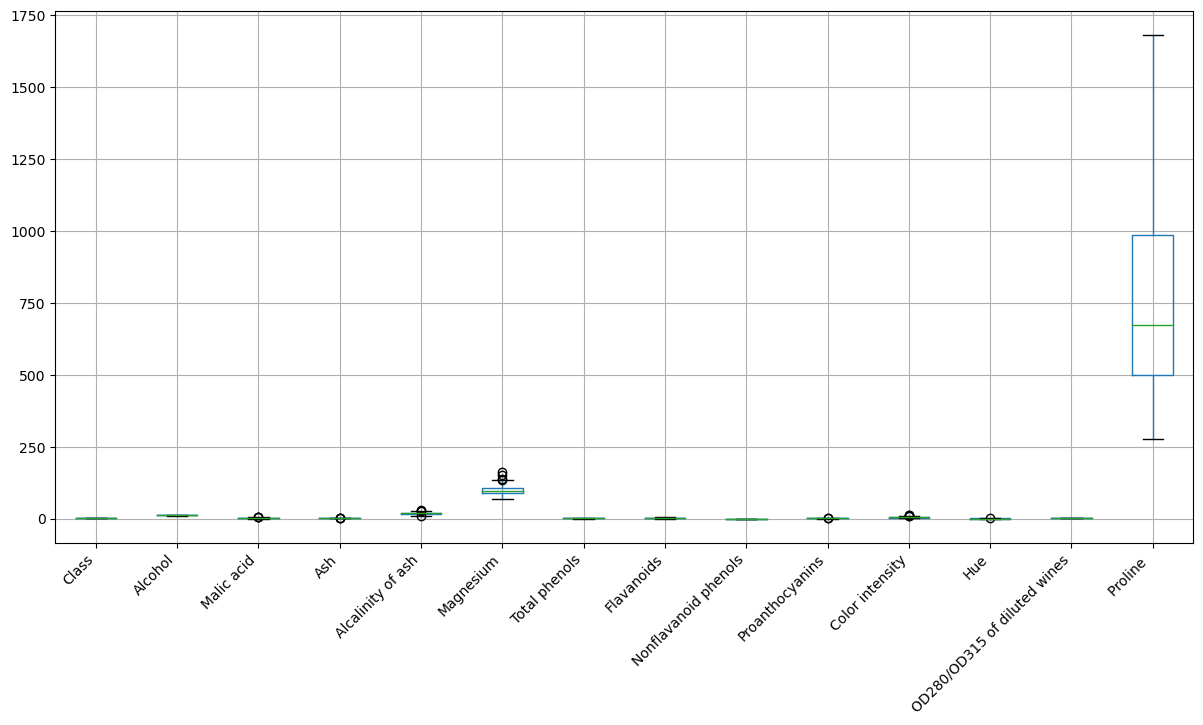

In [7]:
figure , axes = plt.subplots(figsize = (12,6))
figure.autofmt_xdate()
figure.tight_layout()
df.boxplot()
axes.set_xticklabels(axes.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.show()


use the kdeplot() function from the Seaborn library to plot the distributions of the individual columns

In [8]:
df.columns.size

14

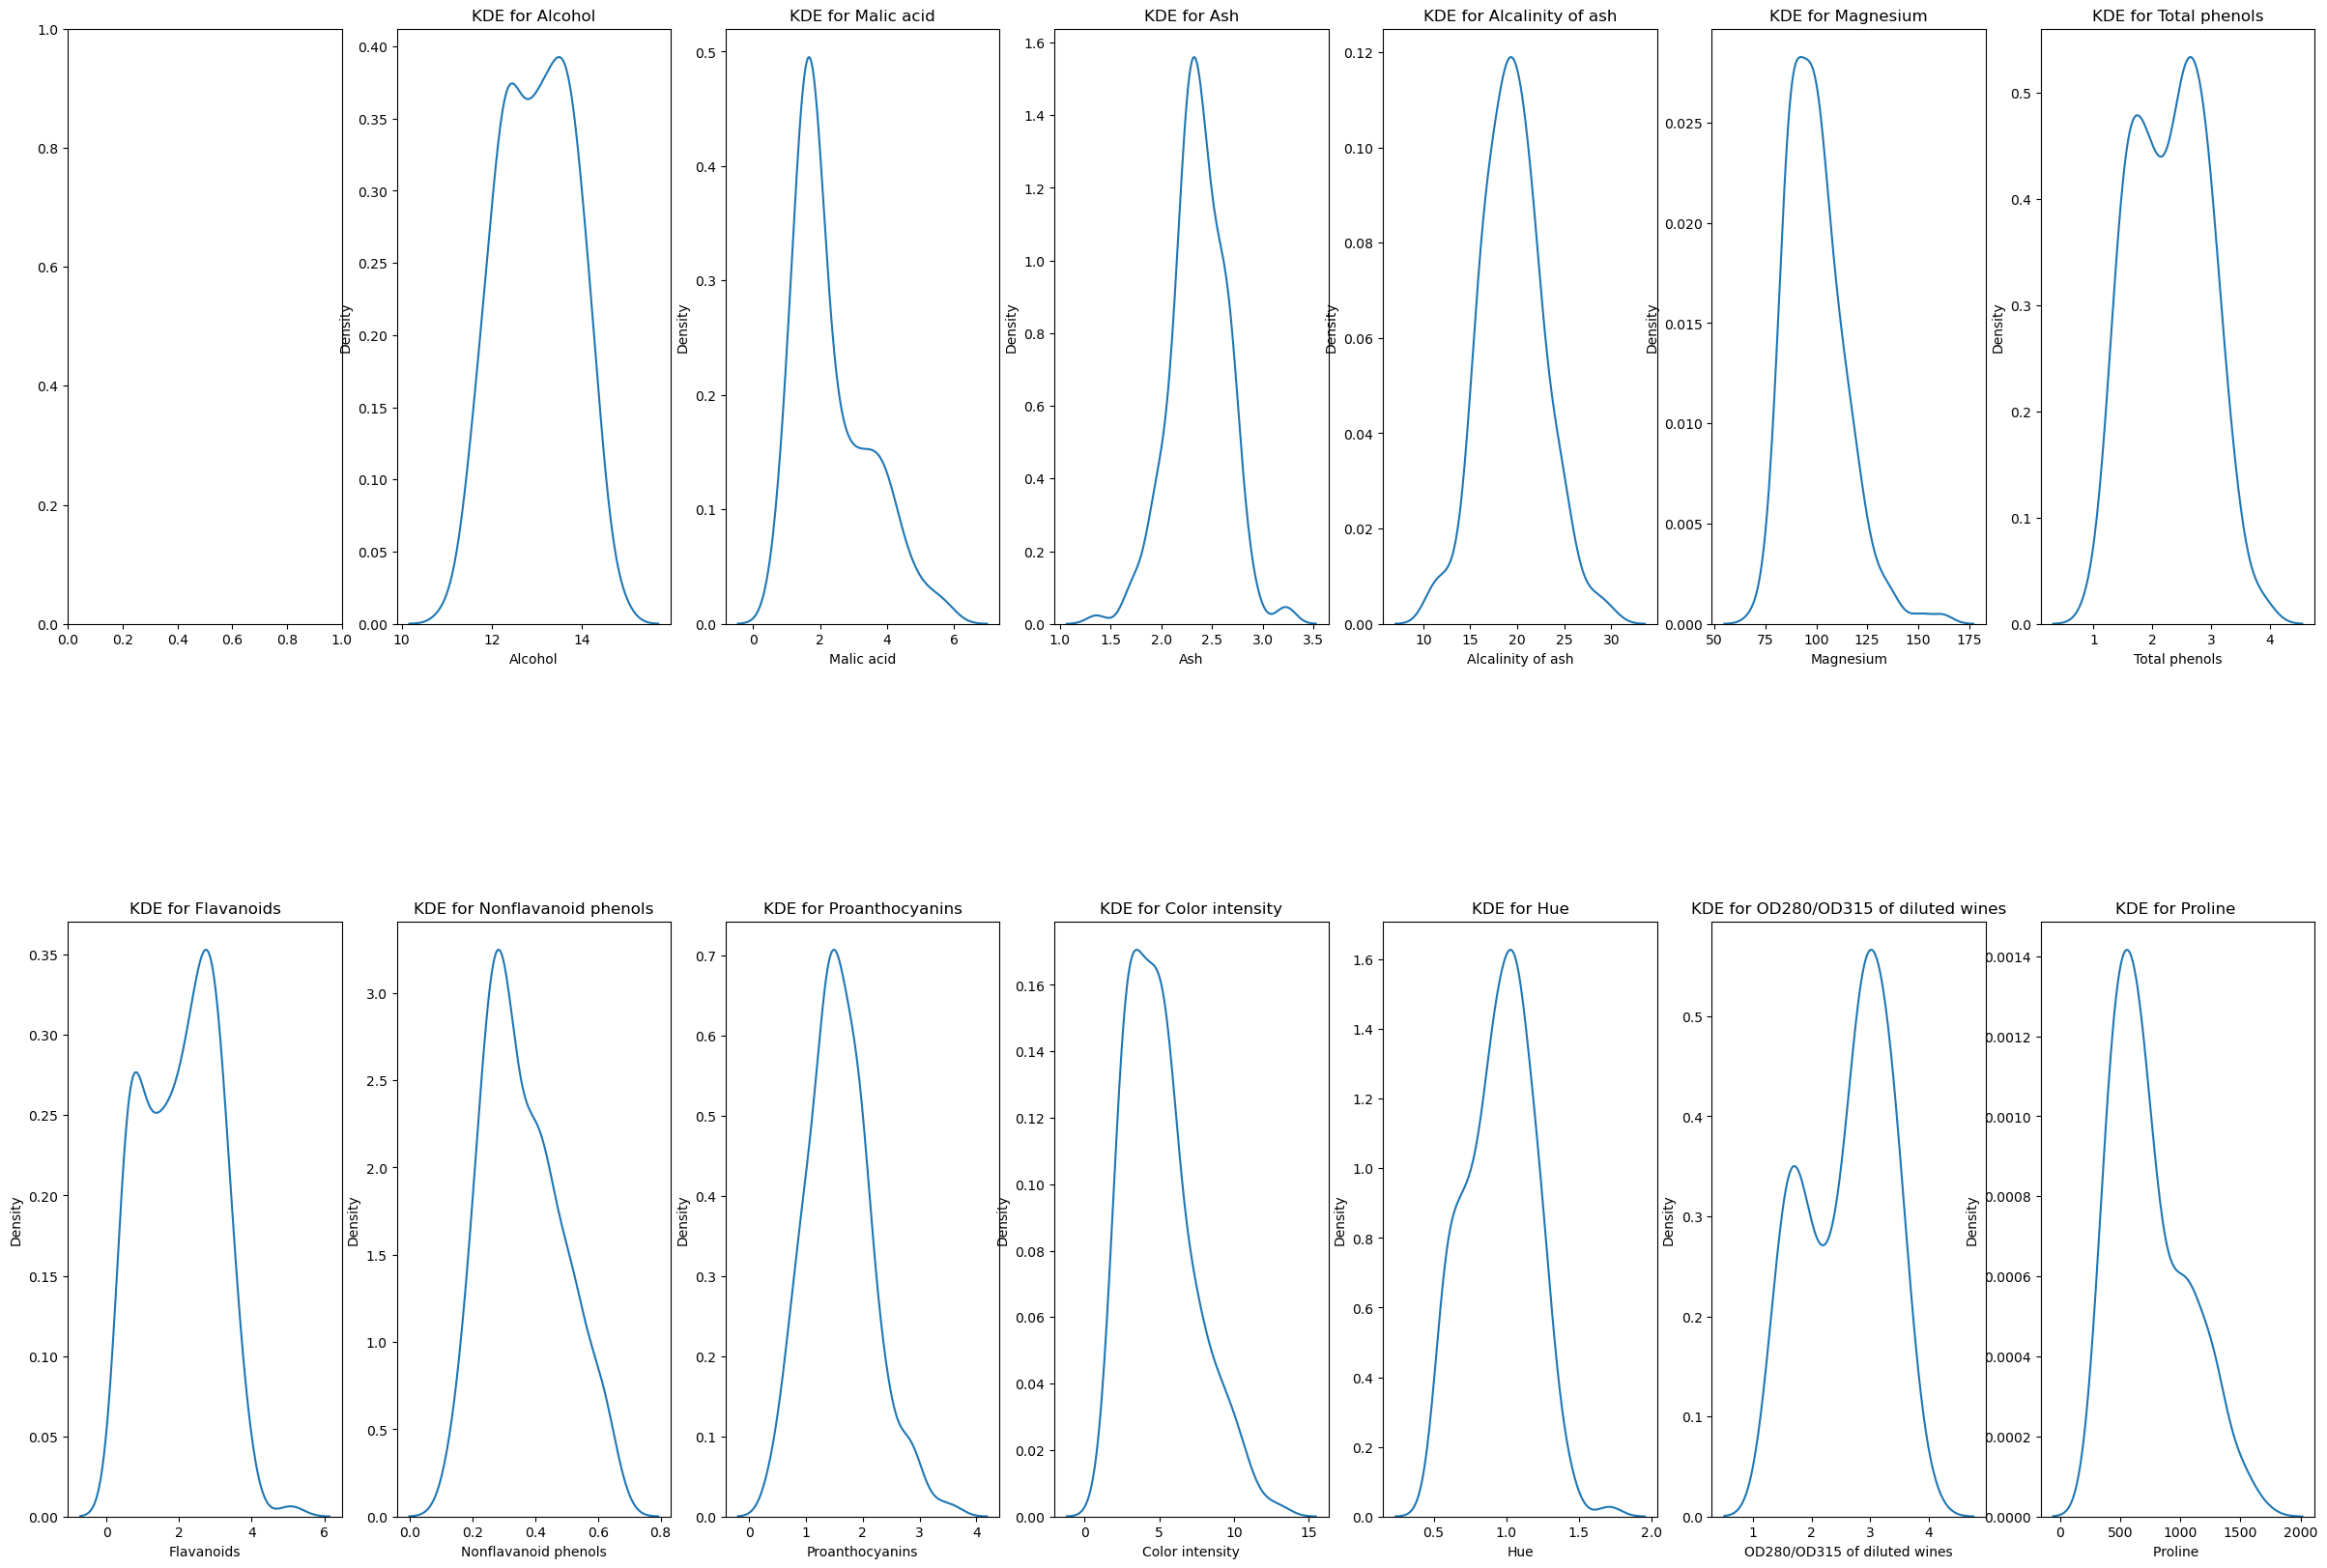

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt


# Setting the number of rows and columns for subplots
num_rows = 2  # 
num_cols = (len(df.columns) + 1) // 2  # Ensure you have enough subplots for all columns

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(30,20))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing

# Flatten the 2D axes array to make it easier to iterate
axes = axes.flatten()

# Loop through each column and plot KDE
for i ,column in enumerate(df.columns):
    if column!="Class":
        
        sns.kdeplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(f'KDE for {column}')
        axes[i].set_xlabel(column)

# If you have an odd number of columns, remove the last empty subplot
if len(df.columns) % 2 != 0:
    fig.delaxes(axes[-1])

# Display the plots
plt.show()

MODEL

In [10]:
# splitting the data into independent and dependent variables
x = df.drop(columns=['Class'])
y = df['Class']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [11]:
print(f"shape of X_train is: {X_train.shape}")
print(f"shape of y_train is: {y_train.shape}")
print(f"shape of X_test is: {X_test.shape}")
print(f"shape of y_test is: {y_test.shape}")

shape of X_train is: (142, 13)
shape of y_train is: (142,)
shape of X_test is: (36, 13)
shape of y_test is: (36,)


In [12]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42)

In [13]:
model

RandomForestClassifier(random_state=42)

In [14]:
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100, 500, 1000],
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 4, 5, 6, 7, 8, 9, 10],
}



In [19]:
grid_search = GridSearchCV(model, params, cv=10)

In [22]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [100, 500, 1000]})

In [25]:
model_best = grid_search.best_estimator_

model_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, n_estimators=500, random_state=42)

In [26]:
# obtaining the classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, model_best.predict(X_test)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        14
           3       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36



# MODEL EXPLANATION

In [27]:
import lime
from lime import lime_tabular

creating LimeTabularExplainer object and then we pass our training data in the form a NumPy array (essential syntactically), the feature names (using the columns attribute of a Pandas dataframe), class names, and since this is a classification problem, we set the mode to be 'classification'.

In [28]:
lime_explainer = lime_tabular.LimeTabularExplainer(training_data=np.array(X_train), feature_names=X_train.columns, 
            class_names=['1', '2', '3'] ,mode='classification')

Deriving the explanation of an instance using the lime_exp function on the previously instantiated lime_explainer

In [38]:
df.head(2)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050


In [29]:
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[1], predict_fn=model_best.predict_proba, top_labels=6, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

d:\Users\ASUS\anaconda3\envs\updated_environment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


    -the model predicts class 1 with 84% confidence, class 2 with 10% confidence, and class 3 with 7% confidence.
    

In [30]:
y_test.iloc[1]

1

The result contains three main pieces of information : 

    (1) the model’s predictions
    (2) features contributions
    (3) the actual value for each feature.

the threshold for the attribute 'proline' is 932.75, above which increases the chance of it being in class 2 or 3 with weightages 0.14 and 0.02 respectively, whereas below it increases the chance of it being in class 3 with weightage 0.17. Here, the value of proline is 1080.00, thus, increasing its probability of being in class 1

In [32]:
explanation = lime_explainer.explain_instance(data_row=X_test.iloc[2], predict_fn=model_best.predict_proba, top_labels=6, num_features=13)

# printing out the explanation
explanation.show_in_notebook()

d:\Users\ASUS\anaconda3\envs\updated_environment\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## Explainability via SHAP

In [33]:
# !pip install numpy==1.24

In [34]:
import numpy as np
import scipy

print("NumPy Version:", np.__version__)
print("SciPy Version:", scipy.__version__)


NumPy Version: 1.24.0
SciPy Version: 1.10.1


In [35]:
import shap
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


AssertionError: Model has no `estimators_`! Have you called `model.fit`?